# Laboratorio de regresión - 2

|                |   |
:----------------|---|
| **Nombre**     | Eugenio Hernández Aranda  |
| **Fecha**      | 26/1/26  |
| **Expediente** | 756225  |

## Regresión polinomial

Observa la siguiente gráfica.

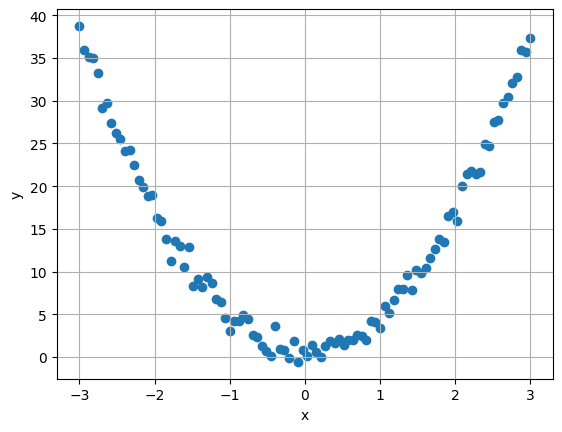

In [ ]:
import matplotlib.pyplot as plt; import numpy as np
%matplotlib inline
np.random.seed(0)
x = np.linspace(-3, 3, 100); y = 1 + 4*x**2 + np.random.normal(0, 1, 100)
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y); plt.grid()

Utiliza `sklearn` para realizar una regresión lineal simple ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x $)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
y

array([ 3.87640523e+01,  3.59603041e+01,  3.51284166e+01,  3.50094882e+01,
        3.32844542e+01,  2.91173043e+01,  2.97517413e+01,  2.73867511e+01,
        2.62007297e+01,  2.55097721e+01,  2.40678269e+01,  2.42320513e+01,
        2.24221947e+01,  2.06955960e+01,  1.99599330e+01,  1.88212776e+01,
        1.89826007e+01,  1.63136663e+01,  1.58915801e+01,  1.38134892e+01,
        1.12330524e+01,  1.35875029e+01,  1.29755473e+01,  1.05755577e+01,
        1.28234736e+01,  8.36473442e+00,  9.15962445e+00,  8.25083268e+00,
        9.32433110e+00,  8.64383076e+00,  6.74172429e+00,  6.40662900e+00,
        4.61175512e+00,  3.01920353e+00,  4.18193174e+00,  4.24542151e+00,
        4.90797663e+00,  4.49806396e+00,  2.55574022e+00,  2.31753196e+00,
        1.27743418e+00,  6.41506397e-01,  1.20176090e-01,  3.57152838e+00,
        9.34792263e-01,  8.59446360e-01, -7.28137255e-02,  1.86931772e+00,
       -5.80839996e-01,  7.90932814e-01,  1.08206533e-01,  1.41996035e+00,
        5.81022227e-01, -

In [ ]:
X=x.reshape(-1,1)
X

array([[-3.        ],
       [-2.93939394],
       [-2.87878788],
       [-2.81818182],
       [-2.75757576],
       [-2.6969697 ],
       [-2.63636364],
       [-2.57575758],
       [-2.51515152],
       [-2.45454545],
       [-2.39393939],
       [-2.33333333],
       [-2.27272727],
       [-2.21212121],
       [-2.15151515],
       [-2.09090909],
       [-2.03030303],
       [-1.96969697],
       [-1.90909091],
       [-1.84848485],
       [-1.78787879],
       [-1.72727273],
       [-1.66666667],
       [-1.60606061],
       [-1.54545455],
       [-1.48484848],
       [-1.42424242],
       [-1.36363636],
       [-1.3030303 ],
       [-1.24242424],
       [-1.18181818],
       [-1.12121212],
       [-1.06060606],
       [-1.        ],
       [-0.93939394],
       [-0.87878788],
       [-0.81818182],
       [-0.75757576],
       [-0.6969697 ],
       [-0.63636364],
       [-0.57575758],
       [-0.51515152],
       [-0.45454545],
       [-0.39393939],
       [-0.33333333],
       [-0

In [ ]:
lr=LinearRegression()
lr.fit(X,y)
B1=lr.coef_
B1

array([-0.04955448])

In [ ]:
B0=lr.intercept_
B0

np.float64(13.30223225795873)

Crea una gráfica donde se muestren las observaciones como una nube de puntos y la línea que ajustaste con regresión. Calcula el métrico $R^2$.

In [ ]:
y_pred=B0+B1*x


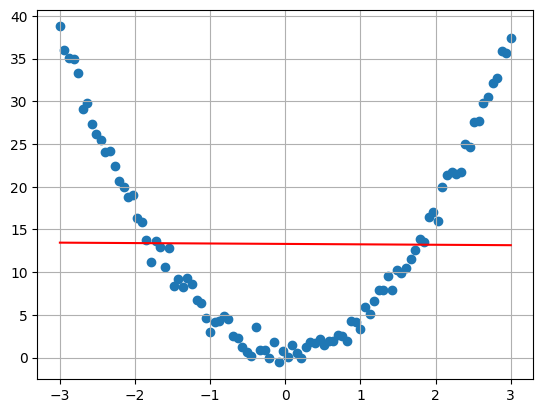

In [ ]:
plt.scatter(x, y); plt.grid()
plt.plot(x, y_pred, color="red")
plt.show()

In [ ]:
R2= lr.score(X,y)
R2

5.80345273922811e-05

Podemos ver que el ajuste no es correcto, pues parece que tiene un comportamiento cuadrático y estamos intentando ajustar una línea recta.

En lugar de hacer una regresión lineal simple, quizás podamos extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + ... + \beta_p X^p + \epsilon$$

Ajusta un modelo cuadrático con `sklearn` ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x + \hat{\beta_1}x^2 $) y calcula su $R^2$.

In [ ]:
X_2=(x**2).reshape(-1,1)
X_cuad= np.hstack((X,X_2))
X_cuad

array([[-3.00000000e+00,  9.00000000e+00],
       [-2.93939394e+00,  8.64003673e+00],
       [-2.87878788e+00,  8.28741965e+00],
       [-2.81818182e+00,  7.94214876e+00],
       [-2.75757576e+00,  7.60422406e+00],
       [-2.69696970e+00,  7.27364555e+00],
       [-2.63636364e+00,  6.95041322e+00],
       [-2.57575758e+00,  6.63452709e+00],
       [-2.51515152e+00,  6.32598714e+00],
       [-2.45454545e+00,  6.02479339e+00],
       [-2.39393939e+00,  5.73094582e+00],
       [-2.33333333e+00,  5.44444444e+00],
       [-2.27272727e+00,  5.16528926e+00],
       [-2.21212121e+00,  4.89348026e+00],
       [-2.15151515e+00,  4.62901745e+00],
       [-2.09090909e+00,  4.37190083e+00],
       [-2.03030303e+00,  4.12213039e+00],
       [-1.96969697e+00,  3.87970615e+00],
       [-1.90909091e+00,  3.64462810e+00],
       [-1.84848485e+00,  3.41689624e+00],
       [-1.78787879e+00,  3.19651056e+00],
       [-1.72727273e+00,  2.98347107e+00],
       [-1.66666667e+00,  2.77777778e+00],
       [-1.

In [ ]:
lr.fit(X_cuad,y)
B1=lr.coef_
B1

array([-0.04955448,  4.14388884])

In [ ]:
B1[1]

np.float64(4.143888838887942)

In [ ]:
B0= lr.intercept_

In [ ]:
y_pred_cuad=B0+B1[0]*x+B1[1]*x**2

In [ ]:
R2_cuad= lr.score(X_cuad,y)
R2_cuad

0.9934118040713642

Crea una gráfica con las observaciones y la nueva curva que ajustaste.

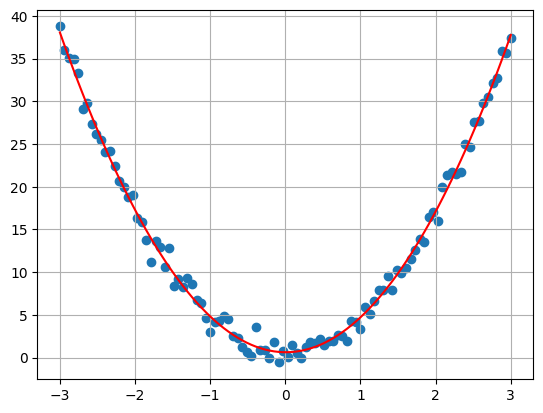

In [ ]:
plt.scatter(x, y); plt.grid()
plt.plot(x, y_pred_cuad, color="red")
plt.show()

Ajusta modelos de grados 3, 5, 7, 9, y 11. Calcula su $R^2$.

In [ ]:
X_3=(x**3).reshape(-1,1)
X_cub= np.hstack((X,X_2,X_3))
lr.fit(X_cub,y)
B0= lr.intercept_
B1=lr.coef_
R2_cub= lr.score(X_cub,y)
R2_cub

0.9934129585186598

In [ ]:
print(B0,B1[0],B1[1],B1[2])

0.6194209631804846 -0.0655753966824348 4.143888838887942 0.0029084754875245977


In [ ]:
X_4=(x**4).reshape(-1,1)
X_5=(x**5).reshape(-1,1)
X_quinta= np.hstack((X,X_2,X_3,X_4,X_5))
lr.fit(X_quinta,y)
B0= lr.intercept_
B1=lr.coef_
R2_quinta= lr.score(X_quinta,y)
R2_quinta

0.9934954953676421

In [ ]:
X_6=(x**6).reshape(-1,1)
X_7=(x**7).reshape(-1,1)
X_7= np.hstack((X,X_2,X_3,X_4,X_5,X_6,X_7))
lr.fit(X_7,y)
B0= lr.intercept_
B1=lr.coef_
R2_7= lr.score(X_7,y)
R2_7

0.9935089341876935

In [ ]:
X_8=(x**8).reshape(-1,1)
X_9=(x**9).reshape(-1,1)
X_9= np.hstack((X,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9))
lr.fit(X_9,y)
B0= lr.intercept_
B1=lr.coef_
R2_9= lr.score(X_9,y)
R2_9

0.9935141799662259

In [ ]:
X_10=(x**10).reshape(-1,1)
X_11= (x**11).reshape(-1,1)
X_11= np.hstack((X,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11))
lr.fit(X_11,y)
B0= lr.intercept_
B1=lr.coef_
R2_11= lr.score(X_11,y)
R2_11

0.9935338704150221

Crea una gráfica por cada modelo con las observaciones y su curva.

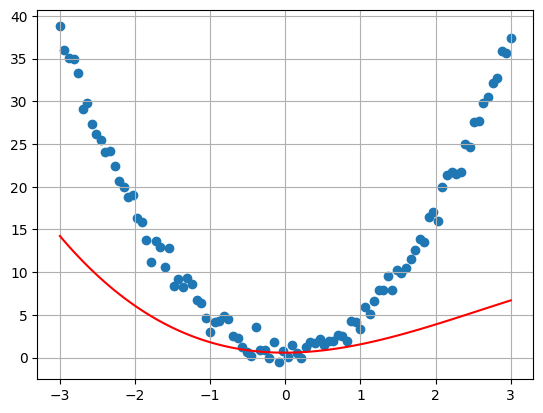

In [ ]:
y_pred_cub=B0+B1[0]*x+B1[1]*x**2+B1[2]*x**3
plt.scatter(x, y); plt.grid()
plt.plot(x, y_pred_cub, color="red")

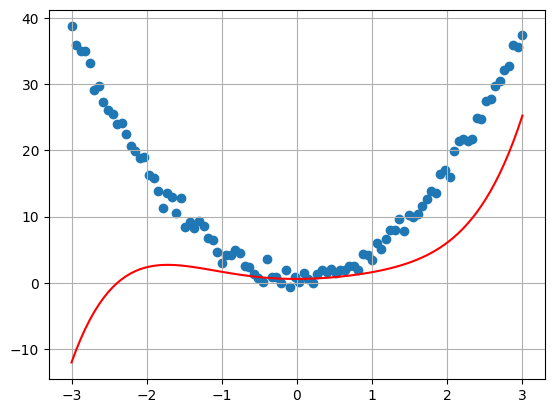

In [ ]:
y_pred_quinta= B0+B1[0]*x+B1[1]*x**2+B1[2]*x**3+B1[3]*x**4+B1[4]*x**5
plt.scatter(x, y); plt.grid()
plt.plot(x, y_pred_quinta, color="red")

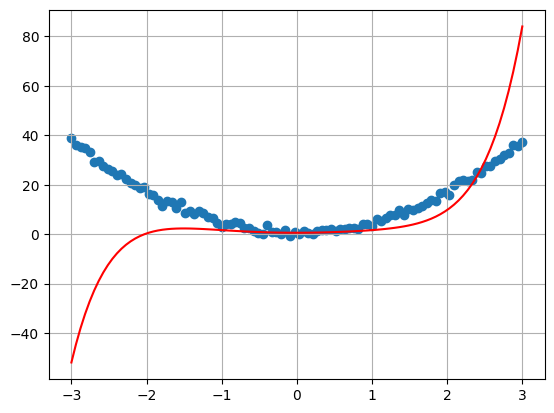

In [ ]:
y_pred_7= B0+B1[0]*x+B1[1]*x**2+B1[2]*x**3+B1[3]*x**4+B1[4]*x**5+B1[5]*x**6+B1[6]*x**7
plt.scatter(x, y); plt.grid()
plt.plot(x, y_pred_7, color="red")

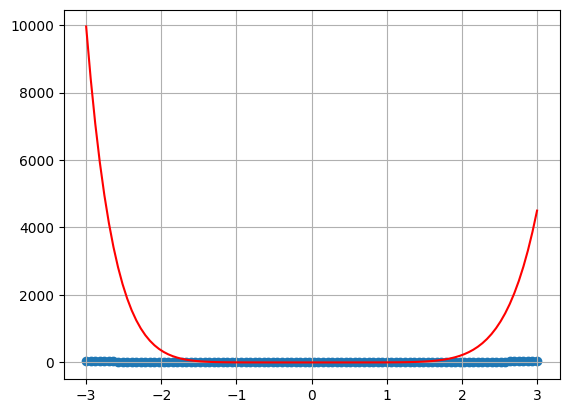

In [ ]:
y_pred_9= B0+B1[0]*x+B1[1]*x**2+B1[2]*x**3+B1[3]*x**4+B1[4]*x**5+B1[5]*x**6+B1[6]*x**7+B1[7]*x**8+B1[8]*x**9
plt.scatter(x, y); plt.grid()
plt.plot(x, y_pred_9, color="red")

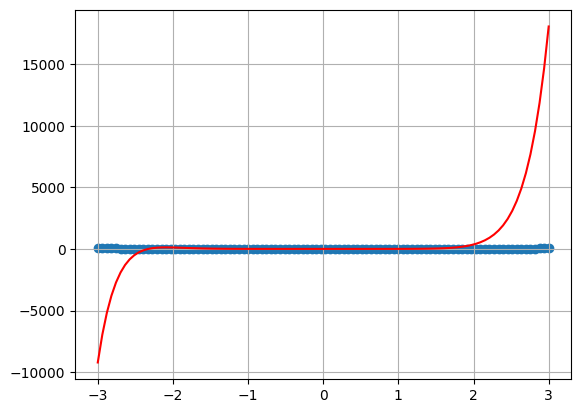

In [ ]:
y_pred_11= B0+B1[0]*x+B1[1]*x**2+B1[2]*x**3+B1[3]*x**4+B1[4]*x**5+B1[5]*x**6+B1[6]*x**7+B1[7]*x**8+B1[8]*x**9+B1[9]*x**10+B1[10]*x**11
plt.scatter(x, y); plt.grid()
plt.plot(x, y_pred_11, color="red")

**¿Cuál modelo consideras que es mejor? ¿Por qué?**

Yo creo que el grado 7, porque se ve muy preciso y después los modelos intentan sobreajustar, y ya no se observa la tendencia de manera clara

Recuerda que una de las metas de ajustar modelos es para poder interpolar y extrapolar. Los datos que tenemos mantienen $x \in [-3, 3]$. ¿Qué pasaría si quisiéramos saber el valor de $y$ cuando $x=5$?

Calcula la predicción $\hat{y}$ para todos los modelos creados (grados 2, 3, 5, 7, 9, y 11).

¿Cuál modelo crees que sea mejor?

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3